## HW5_Non-periodic signals
#### 휴먼지능정보공학과
#### Name : 김영서
#### Student number : 201910787

<br>
<br>

### Exercise 3

Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then
make a wave with duration 1 and framerate 20 kHz.  Draw a sketch of
what you think the spectrum will look like.  Then plot the
spectrum and see if you got it right.
<br>
### Solution

spectrum 예상) <br> 
2500Hz에서 3000Hz까지 sweep되므로 이 범위에서는 Amplitude값이 가장 크게 측정될 것이다. 첫 번째 Harmonic은 5000Hz에서 6000Hz까지 sweep하므로 2500Hz에서 3000Hz에서 보단 낮은 Amplitude값이 측정될 것이고, 다음 Harmonic 범위인 7500Hz에서 9000Hz 부분은 가장 낮은 Amplitude값이 측정될 것이라고 예상된다.

다른 Harmonic들은 모든곳에 aliased 되었기때문에 다른 모든 주파수들에서 몇 에너지를 볼 수 있기를 기대했으며, 이러한 분산된 에너지들은 흥미로운 소리를 생성해낸다.

sawtooth chirp 함수는 다음과 같다.

In [18]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def evaluate(self, ts):
        """Helper function that evaluates the signal.

        ts: float array of times
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

2500Hz에서 3500Hz를 sweep하는 chirp을 만들고, duration은 1, framerate은 20000Hz인 wave로 evalution한 것을 audio로 변환하면 다음과 같다.

In [19]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

wave를 spectrum으로 시각화하면 다음과 같다.

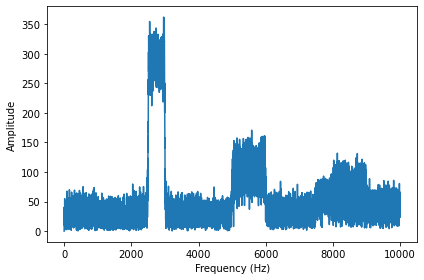

In [21]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')